In [32]:
import albumentations
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMAGE_SIZE = 256

In [61]:
def train_augmentation(image):
    image = np.array(image)

    augmentation = albumentations.Compose(
        [
            albumentations.RandomResizedCrop(IMAGE_SIZE, IMAGE_SIZE),
            albumentations.Transpose(p=0.5),
            albumentations.HorizontalFlip(p=0.5),
            albumentations.VerticalFlip(p=0.5),
            albumentations.ShiftScaleRotate(p=0.5),
            albumentations.HueSaturationValue(hue_shift_limit=0.2,
                                              sat_shift_limit=0.2,
                                              val_shift_limit=0.2, p=0.5
                                              ),
            albumentations.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
                max_pixel_value=255.0,
                p=1.0,
            ),
            albumentations.CoarseDropout(p=0.5),
            albumentations.Cutout(p=0.5),
        ],
        p=1.0,
    )

    augmented = augmentation(image=image)

    return augmented['image']

In [62]:
PATH = '../input/cassava-leaf-disease-classification'

train_set = pd.read_csv(f'{PATH}/train.csv')

json_mapping = {"0": "Cassava Bacterial Blight (CBB)", "1": "Cassava Brown Streak Disease (CBSD)", "2": "Cassava Green Mottle (CGM)", "3": "Cassava Mosaic Disease (CMD)", "4": "Healthy"}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


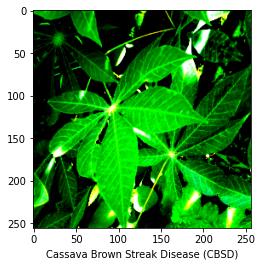

In [68]:
images_array = [x for x in os.listdir(f'{PATH}/train_images')]

def imshow(position: int):
    image_id, category = train_set.iloc[position]
    label = json_mapping.get(f"{category}")
    image_path = f'{PATH}/train_images/{image_id}'
   # img = mpimg.imread(image_path)
    img =  Image.open(image_path)
    img = train_augmentation(img)
   # print(img)
    plt.xlabel(label)
    plt.imshow(img)

imshow(2)